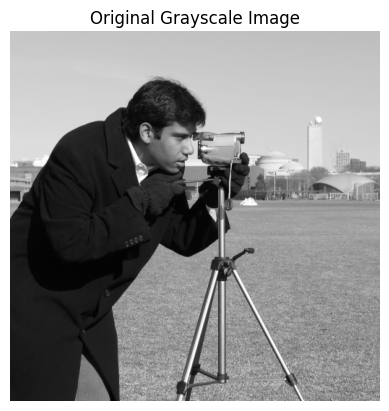

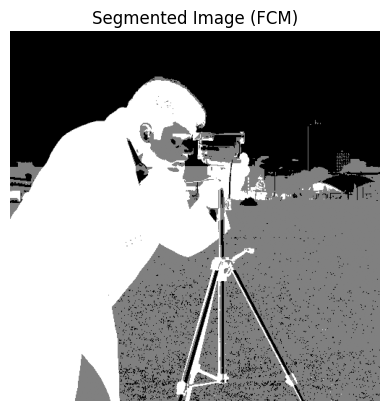

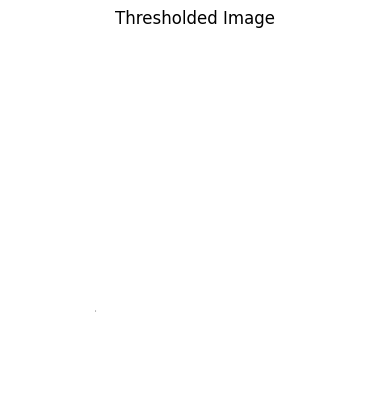

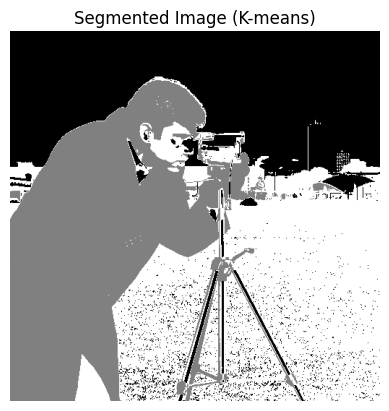

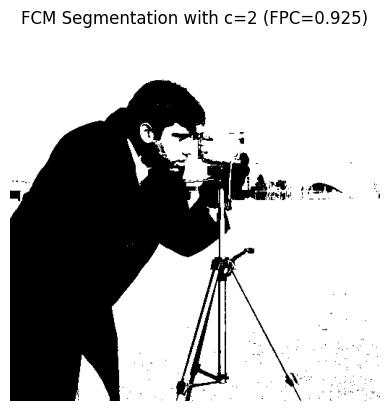

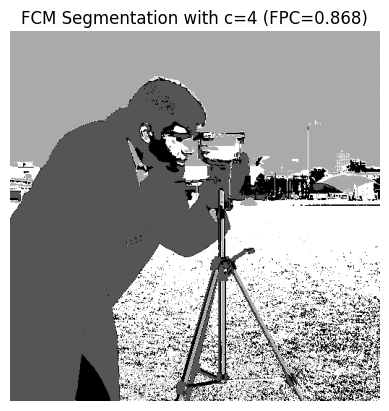

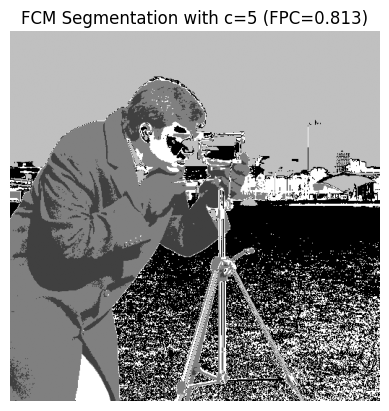

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skimage import io, color
from skimage import data

image = data.camera()  # classic grayscale image

# 1. Load a grayscale image
#  # Replace with your image path
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

# 2. Convert image to 1D pixel array
pixels = image.flatten()

# 3. Apply FCM to segment into 3 clusters
data = np.expand_dims(pixels, axis=0)  # shape: (1, N)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Assign each pixel to the cluster with highest membership
cluster_labels = np.argmax(u, axis=0)

# 4. Reconstruct segmented image
segmented = cluster_labels.reshape(image.shape)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Image (FCM)")
plt.axis('off')
plt.show()
thresholded = image > 0.5
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(pixels.reshape(-1, 1))
kmeans_labels = kmeans.labels_.reshape(image.shape)

plt.imshow(kmeans_labels, cmap='gray')
plt.title("Segmented Image (K-means)")
plt.axis('off')
plt.show()
for c in [2, 4, 5]:
    cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
        data, c=c, m=2, error=0.005, maxiter=1000, init=None)
    
    labels = np.argmax(u, axis=0).reshape(image.shape)
    plt.imshow(labels, cmap='gray')
    plt.title(f"FCM Segmentation with c={c} (FPC={fpc:.3f})")
    plt.axis('off')
    plt.show()
